In [1]:
!pip install opencv-python

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


import cv2
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import tensorflow.keras.backend as K

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tqdm import tqdm
from collections import Counter
from PIL import Image
from itertools import groupby

# import wandb
# from wandb.keras import WandbCallback

In [3]:
''''
here in this example we need to read the text document , and use the text document to generate the path 
for the model . for all the ok startus we are going to generate the text. 
'''

base_path = "data"
# words_list = []

# words = open(f"{base_path}/words.txt", "r").readlines()

file_path=f"{base_path}/words.txt"
file_path_2=f"{base_path}\\words"
# file_path="../input/iam-handwriting-word-database/words_new.txt"
with open(file_path) as f:
    lines = f.readlines()

label_raw=lines[18:]

image_texts =[]
image_paths =[]

default_path=file_path_2
# default_path="../input/iam-handwriting-word-database/iam_words/words/"
for label in label_raw:
  if label.split()[1]=="ok":
    image_texts.append(label.split()[-1])
    image_paths.append(default_path+"\\"+label.split()[0].split("-")[0]+"\\"+label.split()[0].split("-")[0]+"-"+label.split()[0].split("-")[1]+"\\"+label.split()[0]+".png")

In [4]:
lines[18]

'a01-000u-00-00 ok 154 408 768 27 51 AT A\n'

In [5]:
image_texts[0]

'A'

In [6]:
image_paths[0]

'data\\words\\a01\\a01-000u\\a01-000u-00-00.png'

##### sample path 'data\\words\\e04\\e04-030\\e04-030-04-08.png'

In [7]:
image_texts=image_texts
image_paths=image_paths

In [8]:
corrupt_images = []

for path in image_paths:
    try:
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    except:
        corrupt_images.append(path)

[ WARN:0@5.906] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a01\a01-000u\a01-000u-00-00.png'): can't open/read file: check file path/integrity
[ WARN:0@5.908] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a01\a01-000u\a01-000u-00-01.png'): can't open/read file: check file path/integrity
[ WARN:0@5.908] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a01\a01-000u\a01-000u-00-02.png'): can't open/read file: check file path/integrity
[ WARN:0@5.908] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a01\a01-000u\a01-000u-00-03.png'): can't open/read file: check file path/in

[ WARN:0@6.098] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a02\a02-093\a02-093-04-04.png'): can't open/read file: check file path/integrity
[ WARN:0@6.098] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a02\a02-093\a02-093-04-05.png'): can't open/read file: check file path/integrity
[ WARN:0@6.098] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a02\a02-093\a02-093-04-06.png'): can't open/read file: check file path/integrity
[ WARN:0@6.098] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\a02\a02-093\a02-093-05-00.png'): can't open/read file: check file path/integrity


[ WARN:0@6.306] global /Users/xperience/actions-runner/_workIOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

'): can't open/read file: check file path/integrity
[ WARN:0@9.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\h02\h02-012\h02-012-07-00.png'): can't open/read file: check file path/integrity
[ WARN:0@9.006] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\h02\h02-012\h02-012-07-01.png'): can't open/read file: check file path/integrity
[ WARN:0@9.006] global /Users/xperience/actions-runner/_work

[ WARN:0@9.219] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\h07\h07-057a\h07-057a-00-01.png'): can't open/read file: check file path/integrity
[ WARN:0@9.219] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\h07\h07-057a\h07-057a-00-02.png'): can't open/read file: check file path/integrity
[ WARN:0@9.219] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\h07\h07-057a\h07-057a-00-03.png'): can't open/read file: check file path/integrity
[ WARN:0@9.219] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\h07\h07-057a\h07-057a-00-04.png'): can't open/read file: check file path/in

[ WARN:0@9.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\j06\j06-008\j06-008-04-02.png'): can't open/read file: check file path/integrity
[ WARN:0@9.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\j06\j06-008\j06-008-04-03.png'): can't open/read file: check file path/integrity
[ WARN:0@9.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\j06\j06-008\j06-008-04-04.png'): can't open/read file: check file path/integrity
[ WARN:0@9.410] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\j06\j06-008\j06-008-04-05.png'): can't open/read file: check file path/integrity


[ WARN:0@9.629] global /Users/xperience/actions-runnIOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
corrupt_images, len(corrupt_images)

/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-04-02.png'): can't open/read file: check file path/integrity
[ WARN:0@11.127] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-04-03.png'): can't open/read file: check file path/integrity
[ WARN:0@11.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-04-04.png'): can't open/read file: check file path/integrity
[ WARN:0@11.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-04-05.png'): can't open/read file: check file path/integrity
[ WARN:0@11.128] global /Users/xperience/actions-runner/_work/opencv-python/opencv-py

(['data\\words\\a01\\a01-000u\\a01-000u-00-00.png',
  'data\\words\\a01\\a01-000u\\a01-000u-00-01.png',
  'data\\words\\a01\\a01-000u\\a01-000u-00-02.png',
  'data\\words\\a01\\a01-000u\\a01-000u-00-03.png',
  'data\\words\\a01\\a01-000u\\a01-000u-00-04.png',
  'data\\words\\a01\\a01-000u\\a01-000u-00-05.png',
  'data\\words\\a01\\a01-000u\\a01-000u-00-06.png',
  'data\\words\\a01\\a01-000u\\a01-000u-01-00.png',
  'data\\words\\a01\\a01-000u\\a01-000u-01-01.png',
  'data\\words\\a01\\a01-000u\\a01-000u-01-02.png',
  'data\\words\\a01\\a01-000u\\a01-000u-01-03.png',
  'data\\words\\a01\\a01-000u\\a01-000u-01-04.png',
  'data\\words\\a01\\a01-000u\\a01-000u-01-05.png',
  'data\\words\\a01\\a01-000u\\a01-000u-02-00.png',
  'data\\words\\a01\\a01-000u\\a01-000u-02-01.png',
  'data\\words\\a01\\a01-000u\\a01-000u-02-02.png',
  'data\\words\\a01\\a01-000u\\a01-000u-02-03.png',
  'data\\words\\a01\\a01-000u\\a01-000u-02-04.png',
  'data\\words\\a01\\a01-000u\\a01-000u-02-05.png',
  'data\\wor

work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-07-04.png'): can't open/read file: check file path/integrity
[ WARN:0@11.129] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-07-05.png'): can't open/read file: check file path/integrity
[ WARN:0@11.129] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-07-06.png'): can't open/read file: check file path/integrity
[ WARN:0@11.129] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-130\r06-130-08-00.png'): can't open/read file: check file path/integrity
[ WARN:0@11.129] global /Users/xperience/actions-runn

In [10]:
### get vocabulary for the current dataset
vocab = set("".join(map(str, image_texts)))
print(sorted(vocab))

['!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


N:0@11.134] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-137\r06-137-04-06.png'): can't open/read file: check file path/integrity
[ WARN:0@11.134] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-137\r06-137-04-07.png'): can't open/read file: check file path/integrity
[ WARN:0@11.134] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-137\r06-137-04-08.png'): can't open/read file: check file path/integrity
[ WARN:0@11.134] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-137\r06-137-05-00.png'): can't open/read file: check file path/integrity
[

[ WARN:0@11.138] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-143\r06-143-02-10.png'): can't open/read file: check file path/integrity
[ WARN:0@11.138] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-143\r06-143-02-11.png'): can't open/read file: check file path/integrity
[ WARN:0@11.138] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-143\r06-143-02-12.png'): can't open/read file: check file path/integrity
[ WARN:0@11.138] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-143\r06-143-02-13.png'): can't open/read file: check file path/integr

In [11]:
max_label_len = max([len(str(text)) for text in image_texts])
max_label_len

ndDecoder imread_('data\words\r06\r06-143\r06-143-04-08.png'): can't open/read file: check file path/integrity
[ WARN:0@11.140] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-143\r06-143-04-09.png'): can't open/read file: check file path/integrity
[ WARN:0@11.140] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data\words\r06\r06-143\r06-143-04-10.png'): can't open/read file: check file path/integrity


21

In [12]:
char_list = sorted(vocab)

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
    
    return pad_sequences([dig_lst], maxlen=max_label_len, padding='post', value=len(char_list))[0]

In [13]:
padded_image_texts = list(map(encode_to_labels, image_texts))

padded_image_texts[0]

array([26, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
       78, 78, 78, 78], dtype=int32)

In [14]:
train_image_paths = image_paths[ : int(len(image_paths) * 0.90)]
train_image_texts = padded_image_texts[ : int(len(image_texts) * 0.90)]

val_image_paths = image_paths[int(len(image_paths) * 0.90) : ]
val_image_texts = padded_image_texts[int(len(image_texts) * 0.90) : ]

In [15]:
def process_single_sample(img_path, label):

    # 1. Read image
    img = tf.io.read_file(img_path)

    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)

    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)

    # 4. Resize to the desired size
    img = tf.image.resize(img, [32, 128])
    
#     img = tf.transpose(img, perm=[1, 0, 2])
    return {"image": img, "label": label}

In [16]:
batch_size = 20

train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_image_texts))

train_dataset = (
    train_dataset.map(
        process_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, val_image_texts))
validation_dataset = (
    validation_dataset.map(
        process_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

Metal device set to: Apple M2


/Users/mrsca/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


NotFoundError: data\words\a01\a01-000u\a01-000u-00-00.png; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

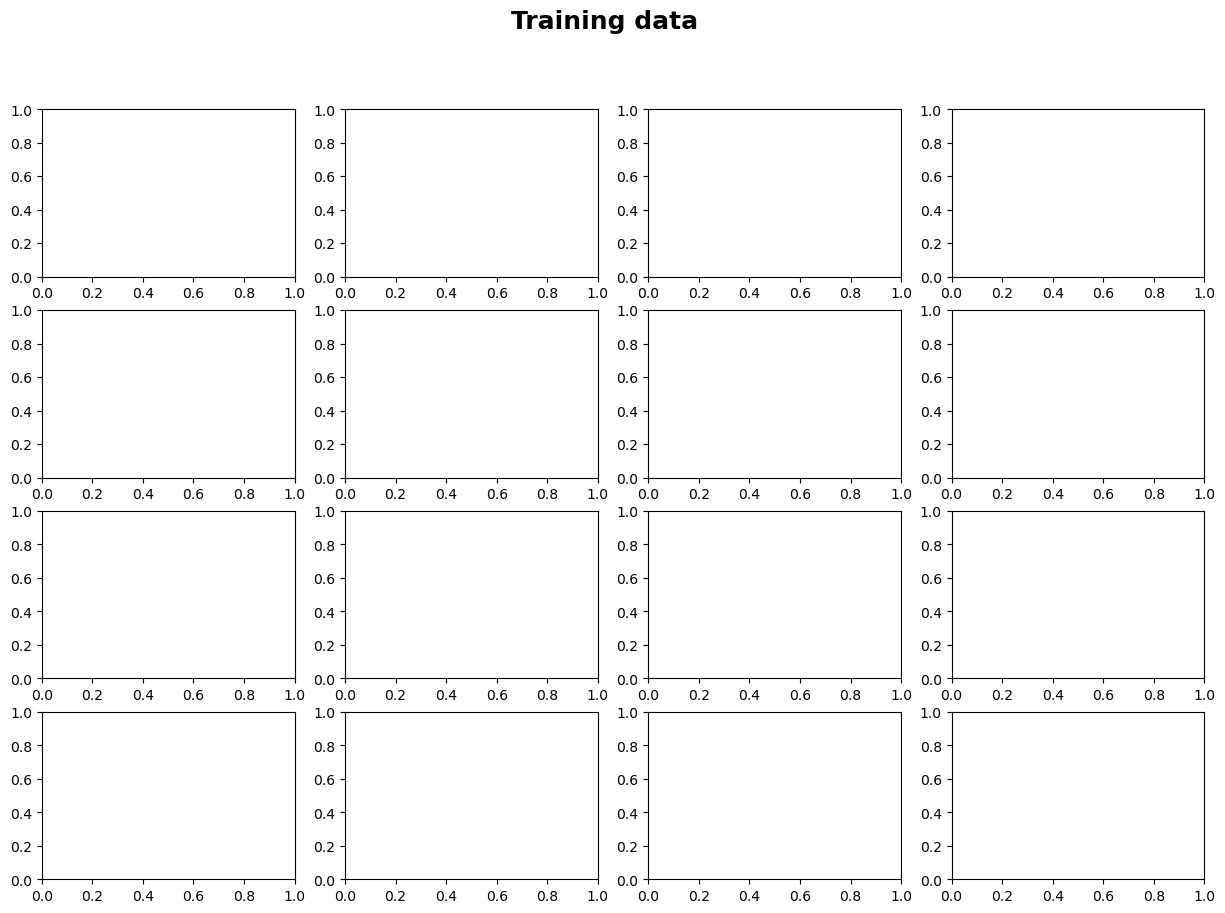

In [17]:
# Mapping characters to integers
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_list, num_oov_indices=0, mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

train_data_fig, ax = plt.subplots(4, 4, figsize=(15, 10))
train_data_fig.suptitle('Training data', weight='bold', size=18)


for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]

    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")

        label = label.replace('[UNK]', '')
        ax[i // 4, i % 4].imshow(img[:, :, 0], cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
    
plt.show()

In [ ]:
## Ref: https://keras.io/examples/vision/captcha_ocr/

class CTCLayer(layers.Layer):

    def __init__(self, name=None):

        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.

        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [ ]:
def ctc_decoder(predictions):
    '''
    input: given batch of predictions from text rec model
    output: return lists of raw extracted text

    '''
    text_list = []
    
    pred_indcies = np.argmax(predictions, axis=2)
    
    for i in range(pred_indcies.shape[0]):
        ans = ""
        
        ## merge repeats
        merged_list = [k for k,_ in groupby(pred_indcies[i])]
        
        ## remove blanks
        for p in merged_list:
            if p != len(char_list):
                ans += char_list[int(p)]
        
        text_list.append(ans)
        
    return text_list

In [ ]:
figures_list = []

class PlotPredictions(tf.keras.callbacks.Callback):

    def __init__(self, frequency=1):
        self.frequency = frequency
        super(PlotPredictions, self).__init__()

        batch = validation_dataset.take(1)
        self.batch_images = list(batch.as_numpy_iterator())[0]["image"]
        self.batch_labels = list(batch.as_numpy_iterator())[0]["label"]

    def plot_predictions(self, epoch):

        prediction_model = keras.models.Model(
            self.model.get_layer(name="image").input, 
            self.model.get_layer(name="dense").output
        )
        
        preds = prediction_model.predict(self.batch_images)
        pred_texts = ctc_decoder(preds)

        orig_texts = []

        for label in self.batch_labels:
            orig_texts.append("".join([char_list[int(char_ind)] for char_ind in label if not(char_ind == len(char_list))]))

        fig , ax = plt.subplots(4, 4, figsize=(15, 5))
        fig.suptitle('Epoch: '+str(epoch), weight='bold', size=14)

        for i in range(16):

            img = (self.batch_images[i, :, :, 0] * 255).astype(np.uint8)
            title = f"Prediction: {pred_texts[i]}"
            ax[i // 4, i % 4].imshow(img, cmap="gray")
            ax[i // 4, i % 4].set_title(title)
            ax[i // 4, i % 4].axis("off")
        
        plt.show()
        #plt.savefig("predictions_epoch_"+ str(epoch)+'.png', bbox_inches = 'tight', pad_inches = 0)
        
        figures_list.append(fig)

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.frequency == 0:
            self.plot_predictions(epoch)

In [ ]:
def train(epochs):
    
    # input with shape of height=32 and width=128 
    inputs = Input(shape=(32, 128, 1), name="image")

    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    conv_1 = Conv2D(32, (3,3), activation = "selu", padding='same')(inputs)
    pool_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
    
    conv_2 = Conv2D(64, (3,3), activation = "selu", padding='same')(pool_1)
    pool_2 = MaxPool2D(pool_size=(2, 2))(conv_2)

    conv_3 = Conv2D(128, (3,3), activation = "selu", padding='same')(pool_2)
    conv_4 = Conv2D(128, (3,3), activation = "selu", padding='same')(conv_3)
    
    conv_5 = Conv2D(512, (3,3), activation = "selu", padding='same')(conv_4)
    conv_6 = Conv2D(512, (3,3), activation = "selu", padding='same')(conv_5)
    drop_out=tf.keras.layers.Dropout(0.2)(conv_6)
    conv_7 = Conv2D(512, (3,3), activation = "selu", padding='same')(drop_out)
    conv_8 = Conv2D(512, (3,3), activation = "selu", padding='same')(conv_7)

    pool_4 = MaxPool2D(pool_size=(2, 1))(conv_8)
    
    conv_5 = Conv2D(256, (3,3), activation = "selu", padding='same')(pool_4)
        
    # Batch normalization layer
    batch_norm_5 = BatchNormalization()(conv_5)
    conv_6 = Conv2D(256, (3,3), activation = "selu", padding='same')(batch_norm_5)
    batch_norm_6 = BatchNormalization()(conv_6)
    pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
    conv_7 = Conv2D(64, (2,2), activation = "selu")(pool_6)
    squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
    
    # bidirectional LSTM layers with units=128
    blstm_1 = Bidirectional(CuDNNLSTM(128, return_sequences=True))(squeezed)
    blstm_2 = Bidirectional(CuDNNLSTM(512, return_sequences=True))(blstm_1)
    blstm_3 = Bidirectional(CuDNNLSTM(512, return_sequences=True))(blstm_2)
    blstm_4 = Bidirectional(CuDNNLSTM(512, return_sequences=True))(blstm_3)
    blstm_5 = Bidirectional(CuDNNLSTM(128, return_sequences=True))(blstm_4)
    dense_=Dense(128,activation = 'relu')(blstm_5)
    softmax_output = Dense(len(char_list) + 1, activation = 'softmax', name="dense")(dense_)

    output = CTCLayer(name="ctc_loss",)(labels, softmax_output)


    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, clipnorm=1.0)

    #model to be used at training time
    model = Model(inputs=[inputs, labels], outputs=output)
    model.compile(optimizer = optimizer,metrics=[tf.keras.metrics.Accuracy()])

    print(model.summary())
    file_path = "/kaggle/working/C_LSTM_best.hdf5"
    
    checkpoint = ModelCheckpoint(filepath=file_path, 
                                monitor='val_loss', 
                                verbose=1, 
                                save_best_only=True, 
                                mode='min')

#     callbacks_list = [checkpoint, 
#                       WandbCallback(monitor="val_loss", 
#                                     mode="min", 
#                                     log_weights=True),
#                       PlotPredictions(frequency=1),
#                       EarlyStopping(patience=3, verbose=1)]

    history = model.fit(train_dataset, 
                        epochs = epochs,
                        validation_data=validation_dataset,
                        verbose = 1,
                        shuffle=True)
    
    return model

In [ ]:
# need to change the epoch
model = train(epochs=1)

In [ ]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense").output
)
prediction_model.summary()

In [ ]:
#  Let's check results on some validation samples
for batch in validation_dataset.take(1):

    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = ctc_decoder(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    fig , ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(16):

        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
        
plt.show()